In [1016]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dosya Okuma

In [1017]:
oasis = pd.read_csv("oasis.csv")

In [1018]:
### Group -------> Demented, Non-demented veya Converted sÄ±nÄ±flarÄ±
### Visit -------> HastanÄ±n Ziyaret SayÄ±sÄ±
### MR Delay ----> Delay Magnetic Resonance(MR) gecikmesi, gÃ¶rÃ¼ntÃ¼ alÄ±mÄ± yapÄ±lmadan Ã¶nce verilen gecikme sÃ¼resi
### M/F ---------> HastanÄ±n Cinsiyeti
### Age ---------> HastanÄ±n Tarama SÄ±rasÄ±ndaki YaÅŸÄ±
### EDUC --------> HastanÄ±n EÄŸitim HayatÄ±(yÄ±l)
### SES ---------> HastanÄ±n Sosyo Ekonomik Durumu (1-5)
### MMSE --------> Mini Mental Durum Testi PuanÄ±
### CDR ---------> Klinik Demans Derecelendirmesi
### eTIV --------> Deneysel Toplam Kafa Ä°Ã§i Hacmi
### nWBV --------> Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi
### ASF ---------> Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼

### Parametre olarak alÄ±nmayanlar;
### Subject ID --> HastanÄ±n kimlik numarasÄ±
### MR ID -------> Her hastanÄ±n MR kimlik numarasÄ±
### Hand --------> SaÄŸ el yada Sol el kullanma alÄ±ÅŸkanlÄ±ÄŸÄ± (tÃ¼m Ã¶rnekler SaÄŸ el kullanmaktadÄ±r)

############### Mini Mental Durum Testi PuanÄ± ###############
###  MMSE      Demans Skoru                               ###
### 25-30 --> SaÄŸlÄ±klÄ± (Demans DeÄŸil)                     ###
### 21-24 --> Erken aÅŸama Alzheimer (Very Mild Alzheimer) ###
### 10-20 --> Orta aÅŸama Alzheimer (Mild Alzheimer)       ###
###  0-10 --> Ä°leri aÅŸama (Modarate Alzheimer)            ###
#############################################################

############## Klinik Demans Derecelendirmesi ###############
### CDR      Demans Skoru                                 ###
###  0  --> SaÄŸlÄ±klÄ± (Demans DeÄŸil)                       ###
### 0,5 --> Erken aÅŸama Alzheimer (Very Mild Alzheimer)   ###
###  1  --> Orta aÅŸama Alzheimer (Mild Alzheimer)         ###
###  2  --> Ä°leri aÅŸama (Modarate Alzheimer)              ###
###  3  --> Åžiddetli (Son) aÅŸama (Severe Alzheimer)       ###
#############################################################

In [1019]:
print(oasis)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  

In [1020]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

# Veri Analizi

In [1021]:
# Analiz
oasis.describe()

Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.000000  1357.000000    0.700000    1.099000  
50%     29.000000    0.000000  1470.000000    0.729000    1.194000  
75%     30.000000    0.500000  1597.000000    0.756000    1.293000  
max     30.000000    2.000000  2004.000000    0.837000    1.587000

In [1022]:
# Veri FarklÄ±lÄ±klarÄ±
# Ne kadar farklÄ± deÄŸer var

for i in list(oasis.columns):
    print(f"{i} -> {oasis[i].value_counts().shape[0]}")

Subject ID -> 150
MRI ID -> 373
Group -> 3
Visit -> 5
MR Delay -> 201
M/F -> 2
Hand -> 1
Age -> 39
EDUC -> 12
SES -> 5
MMSE -> 18
CDR -> 4
eTIV -> 286
nWBV -> 136
ASF -> 265


In [1023]:
# Null DeÄŸerler
# Ne kadar null deÄŸer var
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

## Null iÅŸlemler

In [1024]:
# Veri setinin ilk 15 deÄŸerini yaz
oasis.head(15)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2   OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3   OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4   OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
10  OAS2_0007  OAS2_0007_MR1     Demented      1         0   M    R   71   
11  OAS2_0007  OAS2_0007_MR3     Demented      3       518   M    R   73   
12  OAS2_0007  OAS2_0007_MR4     Demented      4      1281   M    R   75   
13  OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14  OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0  0.0  1987  0.696  0.883  
1     14  2.0  30.0  0.0  2004  0.681  0.876  
2     12  NaN  23.0  0.5  1678  0.736  1.046  
3     12  NaN  28.0  0.5  1738  0.713  1.010  
4     12  NaN  22.0  0.5  1698  0.701  1.034  
5     18  3.0  28.0  0.0  1215  0.710  1.444  
6     18  3.0  27.0  0.0  1200  0.718  1.462  
7     12  4.0  28.0  0.0  1689  0.712  1.039  
8     12  4.0  29.0  0.5  1701  0.711  1.032  
9     12  4.0  30.0  0.0  1699  0.705  1.033  
10    16  NaN  28.0  0.5  1357  0.748  1.293  
11    16  NaN  27.0  1.0  1365  0.727  1.286  
12    16  NaN  27.0  1.0  1372  0.710  1.279  
13    14  2.0  30.0  0.0  1272  0.698  1.380  
14    14  2.0  29.0  0.0  1257  0.703  1.396

In [1025]:
# Null kayÄ±tlarÄ± dropla ve ilk 15 deÄŸerini yaz
oasis.dropna().head(15)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0   OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1   OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
5   OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6   OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7   OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8   OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9   OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
13  OAS2_0008  OAS2_0008_MR1  Nondemented      1         0   F    R   93   
14  OAS2_0008  OAS2_0008_MR2  Nondemented      2       742   F    R   95   
15  OAS2_0009  OAS2_0009_MR1     Demented      1         0   M    R   68   
16  OAS2_0009  OAS2_0009_MR2     Demented      2       576   M    R   69   
17  OAS2_0010  OAS2_0010_MR1     Demented      1         0   F    R   66   
18  OAS2_0010  OAS2_0010_MR2     Demented      2       854   F    R   68   
19  OAS2_0012  OAS2_0012_MR1  Nondemented      1         0   F    R   78   
20  OAS2_0012  OAS2_0012_MR2  Nondemented      2       730   F    R   80   

    EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0     14  2.0  27.0  0.0  1987  0.696  0.883  
1     14  2.0  30.0  0.0  2004  0.681  0.876  
5     18  3.0  28.0  0.0  1215  0.710  1.444  
6     18  3.0  27.0  0.0  1200  0.718  1.462  
7     12  4.0  28.0  0.0  1689  0.712  1.039  
8     12  4.0  29.0  0.5  1701  0.711  1.032  
9     12  4.0  30.0  0.0  1699  0.705  1.033  
13    14  2.0  30.0  0.0  1272  0.698  1.380  
14    14  2.0  29.0  0.0  1257  0.703  1.396  
15    12  2.0  27.0  0.5  1457  0.806  1.205  
16    12  2.0  24.0  0.5  1480  0.791  1.186  
17    12  3.0  30.0  0.5  1447  0.769  1.213  
18    12  3.0  29.0  0.5  1482  0.752  1.184  
19    16  2.0  29.0  0.0  1333  0.748  1.316  
20    16  2.0  29.0  0.0  1323  0.738  1.326

In [1026]:
# Ne kadar null deÄŸer var?
# SES ve MMSE de null deÄŸerler varmÄ±ÅŸ
oasis.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [1027]:
# SES ve MMSE sÃ¼tunlarÄ±ndaki eksik (NaN) Null deÄŸerleri, her bir sÃ¼tunun ortalamasÄ± ile doldur
oasis_filled = oasis.fillna({
    "SES": oasis["SES"].mean(),    # SES sÃ¼tunu iÃ§in ortalama deÄŸerle doldur
    "MMSE": oasis["MMSE"].mean()   # MMSE sÃ¼tunu iÃ§in ortalama deÄŸerle doldur
})

In [1028]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.0  27.0  0.0  1987  0.696  0.883  
1      14  2.0  30.0  0.0  2004  0.681  0.876  
2      12  NaN  23.0  0.5  1678  0.736  1.046  
3      12  NaN  28.0  0.5  1738  0.713  1.010  
4      12  NaN  22.0  0.5  1698  0.701  1.034  
..    ...  ...   ...  ...   ...    ...    ...  
368    16  1.0  28.0  0.5  1693  0.694  1.037  
369    16  1.0  26.0  0.5  1688  0.675  1.040  
370    13  2.0  30.0  0.0  1319  0.801  1.331  
371    13  2.0  30.0  0.0  1327  0.796  1.323  
372    13  2.0  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [1029]:
# GÃ¼ncellenmiÅŸ (eksikleri doldurulmuÅŸ) veriyi "oasisUpdateNull.csv" adlÄ± yeni bir dosyaya kaydet
# index=False yazarak DataFrame'in satÄ±r numaralarÄ±nÄ±n (index) dosyaya yazÄ±lmasÄ±nÄ± engelliyoruz
oasis_filled.to_csv("oasisUpdateNull.csv", index=False)

# ArtÄ±k eksik verileri doldurulmuÅŸ olan CSV dosyasÄ±nÄ± yeniden okuyoruz ve oasis deÄŸiÅŸkenine atÄ±yoruz
# Bu sayede sonraki iÅŸlemlerimizi temiz veri Ã¼zerinden gerÃ§ekleÅŸtirebiliriz
oasis = pd.read_csv("oasisUpdateNull.csv")
print("\nâœ… Null deÄŸerler iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateNull.csv' dosyasÄ±na kaydedildi.")


âœ… Null deÄŸerler iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateNull.csv' dosyasÄ±na kaydedildi.


In [1030]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  27.0  0.0  1987  0.696  0.883  
1      14  2.000000  30.0  0.0  2004  0.681  0.876  
2      12  2.460452  23.0  0.5  1678  0.736  1.046  
3      12  2.460452  28.0  0.5  1738  0.713  1.010  
4      12  2.460452  22.0  0.5  1698  0.701  1.034  
..    ...       ...   ...  ...   ...    ...    ...  
368    16  1.000000  28.0  0.5  1693  0.694  1.037  
369    16  1.000000  26.0  0.5  1688  0.675  1.040  
370    13  2.000000  30.0  0.0  1319  0.801  1.331  
371    13  2.000000  30.0  0.0  1327  0.796  1.323  
372    13  2.000000  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [1031]:
# Ne kadar null deÄŸer var? Kontrol edelim
# Null deÄŸer 
oasis.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## AykÄ±rÄ± DeÄŸerler

In [1032]:
# Veri tiplerini kontrol et
print(oasis.dtypes)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


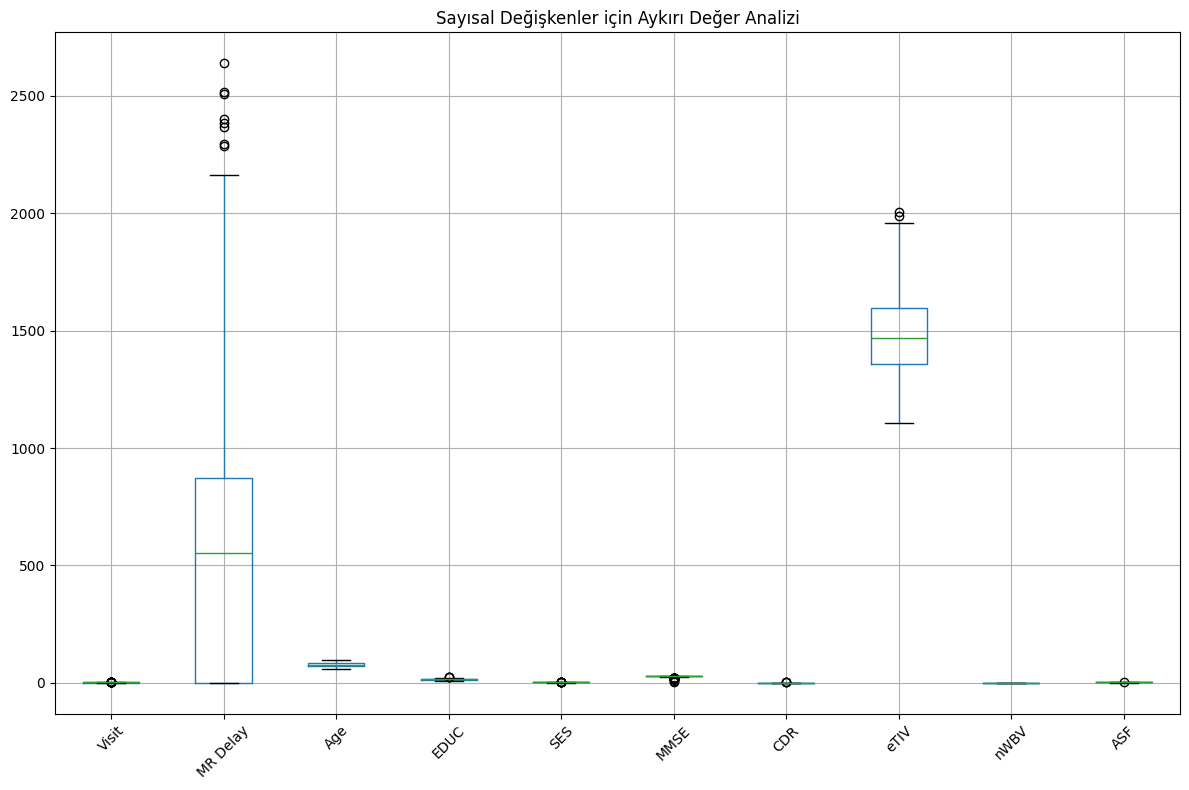

In [1033]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

In [1034]:
# TemizlenmiÅŸ (null deÄŸeri olmayan) veriyi oku
oasis = pd.read_csv("oasisUpdateNull.csv")

# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# Her sayÄ±sal sÃ¼tun iÃ§in aykÄ±rÄ± deÄŸer kontrolÃ¼ ve dÃ¼zeltme iÅŸlemi
for col in numeric_columns:
    # 1. ve 3. Ã§eyrekleri hesapla
    Q1 = oasis[col].quantile(0.25)
    Q3 = oasis[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Alt ve Ã¼st sÄ±nÄ±rlarÄ± belirle
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # AykÄ±rÄ± deÄŸerleri bul (sÄ±nÄ±rlarÄ±n dÄ±ÅŸÄ±nda kalanlar)
    outliers = oasis[(oasis[col] < lower_limit) | (oasis[col] > upper_limit)][col]

    # EÄŸer aykÄ±rÄ± deÄŸer varsa, bilgi yazdÄ±r
    if len(outliers) > 0:
        print(f"\nðŸ“Š {col} sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:")
        print(f"   - Alt sÄ±nÄ±r: {lower_limit:.2f}")
        print(f"   - Ãœst sÄ±nÄ±r: {upper_limit:.2f}")
        print(f"   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: {len(outliers)}")
        print(f"   - Ä°lk 5 aykÄ±rÄ± deÄŸer:")
        print(outliers.head())

    # AykÄ±rÄ± deÄŸerleri alt/Ã¼st sÄ±nÄ±rlarla deÄŸiÅŸtir
    oasis[col] = oasis[col].apply(
        lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x)
    )

# AykÄ±rÄ± deÄŸerleri dÃ¼zeltilmiÅŸ veriyi yeni dosyaya kaydet
oasis.to_csv("oasisUpdateAykiri.csv", index=False)

# GÃ¼ncellenmiÅŸ veriyi tekrar oku
oasis = pd.read_csv("oasisUpdateAykiri.csv")

print("\nâœ… AykÄ±rÄ± deÄŸer iÅŸlemi tamamlandÄ±. GÃ¼ncellenmiÅŸ veri 'oasisUpdateAykiri.csv' dosyasÄ±na kaydedildi.")


ðŸ“Š Visit sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: -0.50
   - Ãœst sÄ±nÄ±r: 3.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 21
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
12    4
31    4
32    5
35    4
50    4
Name: Visit, dtype: int64

ðŸ“Š MR Delay sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: -1309.50
   - Ãœst sÄ±nÄ±r: 2182.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 8
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
32     2400
71     2369
75     2508
153    2386
159    2288
Name: MR Delay, dtype: int64

ðŸ“Š EDUC sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 6.00
   - Ãœst sÄ±nÄ±r: 22.00
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 3
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
107    23
108    23
109    23
Name: EDUC, dtype: int64

ðŸ“Š SES sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 0.50
   - Ãœst sÄ±nÄ±r: 4.50
   - AykÄ±rÄ± deÄŸer sayÄ±sÄ±: 7
   - Ä°lk 5 aykÄ±rÄ± deÄŸer:
136    5.0
137    5.0
138    5.0
161    5.0
162    5.0
Name: SES, dtype: float64

ðŸ“Š MMSE sÃ¼tunundaki aykÄ±rÄ± deÄŸerler:
   - Alt sÄ±nÄ±r: 22.50
   - Ãœst sÄ±nÄ

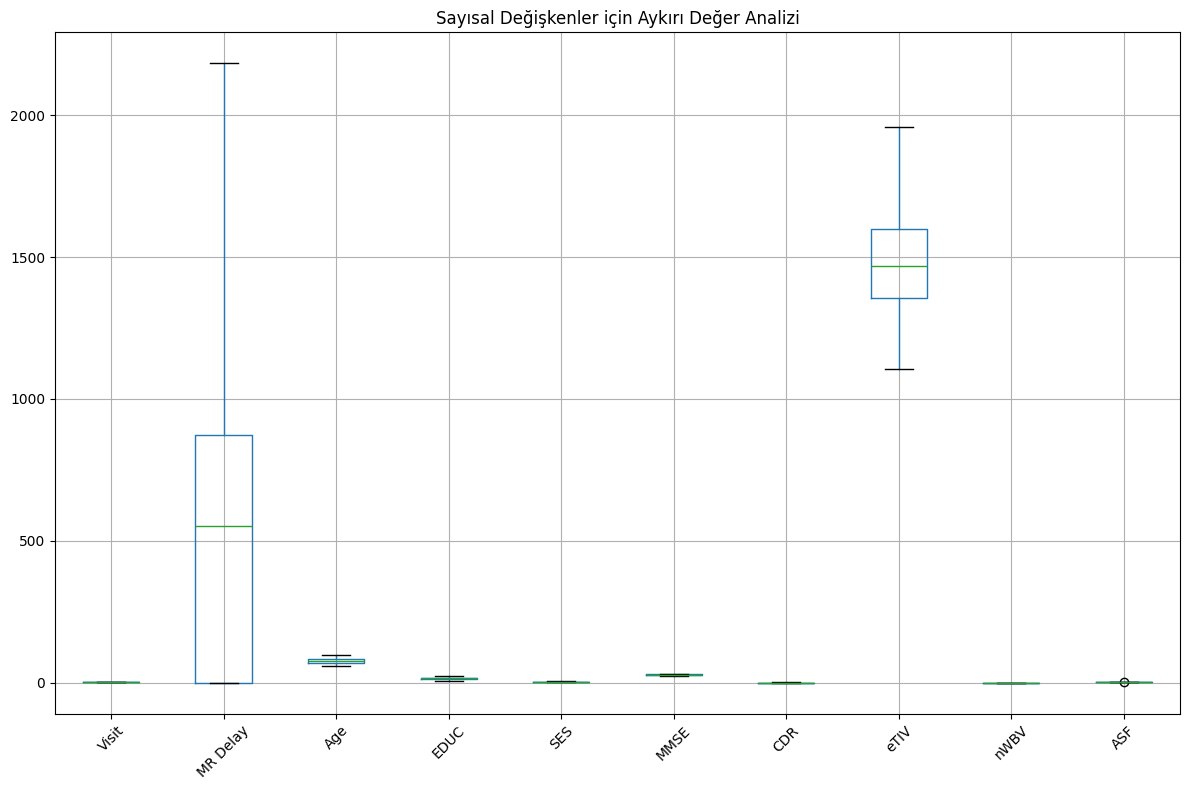


âœ…GÃ¼ncellenmiÅŸ veri seti:
  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87  14.0   
1  OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88  14.0   
2  OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75  12.0   
3  OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76  12.0   
4  OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80  12.0   

        SES  MMSE  CDR    eTIV   nWBV    ASF  
0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1  2.000000  30.0  0.0  1957.0  0.681  0.876  
2  2.460452  23.0  0.5  1678.0  0.736  1.046  
3  2.460452  28.0  0.5  1738.0  0.713  1.010  
4  2.460452  22.5  0.5  1698.0  0.701  1.034  


Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2182.5   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0   F    R   65   

     EDUC       SES  MMSE  CDR    eTIV   nWBV    ASF  
0    14.0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1    14.0  2.000000  30.0  0.0  1957.0  0.681  0.876  
2    12.0  2.460452  23.0  0.5  1678.0  0.736  1.046  
3    12.0  2.460452  28.0  0.5  1738.0  0.713  1.010  
4    12.0  2.460452  22.5  0.5  1698.0  0.701  1.034  
..    ...       ...   ...  ...     ...    ...    ...  
368  16.0  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  16.0  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  13.0  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  13.0  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  13.0  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [1035]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

print("\nâœ…GÃ¼ncellenmiÅŸ veri seti:") # (AykÄ±rÄ± deÄŸerler giderildi)
print(oasis.head())
oasis

## Veri GÃ¶rselleÅŸtirme

Text(0.5, 1.0, 'Gurup daÄŸÄ±lÄ±mÄ±')

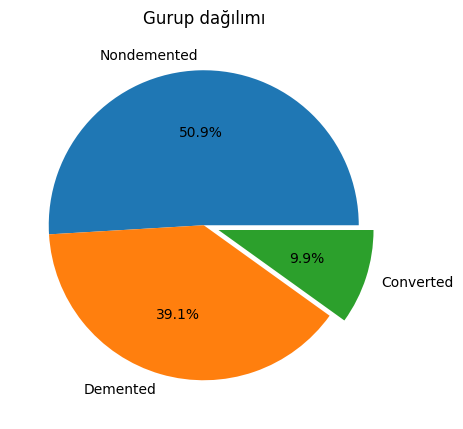

In [1036]:
director_count = oasis["Group"].str.split(expand=True).stack().value_counts()
explode = [0,0,0.1]

plt.figure(figsize=(5,8))
plt.pie(director_count, labels=director_count.index, autopct="%1.1f%%", explode = explode)

plt.title("Gurup daÄŸÄ±lÄ±mÄ±") # Ã‡ok bÃ¼yÃ¼k veri dengesizliÄŸi!

### Histogram tablolarÄ±

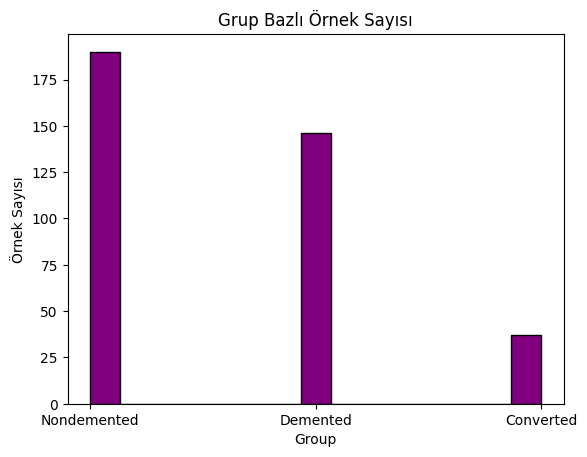

In [1037]:
plt.hist(oasis["Group"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Group")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Grup BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

# plt.xticks(rotation = 0)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

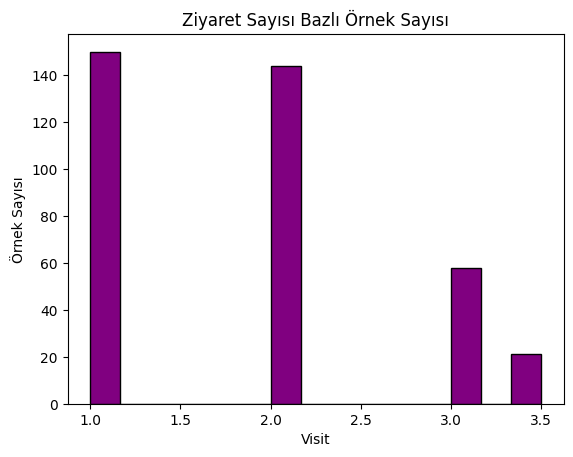

In [1038]:
plt.hist(oasis["Visit"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("Visit")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Ziyaret SayÄ±sÄ± BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

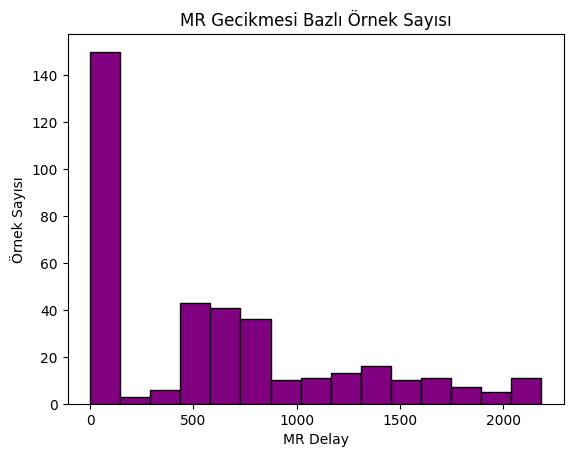

In [1039]:
plt.hist(oasis["MR Delay"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("MR Delay")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "MR Gecikmesi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

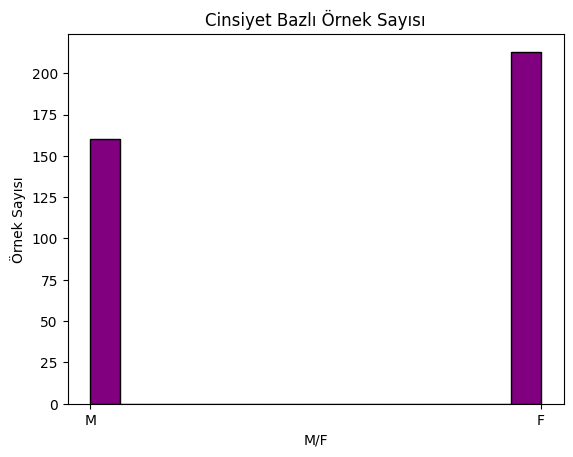

In [1040]:
plt.hist(oasis["M/F"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("M/F")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Cinsiyet BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()
# M/F hÃ¢lÃ¢ sayÄ±sal veri deÄŸil M ve F ÅŸeklinde

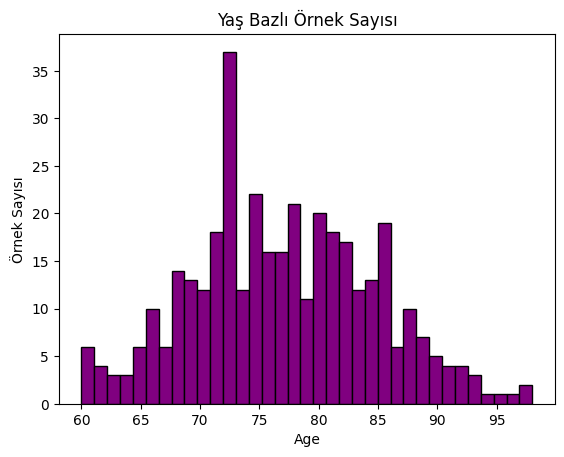

In [1041]:
plt.hist(oasis["Age"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "YaÅŸ BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

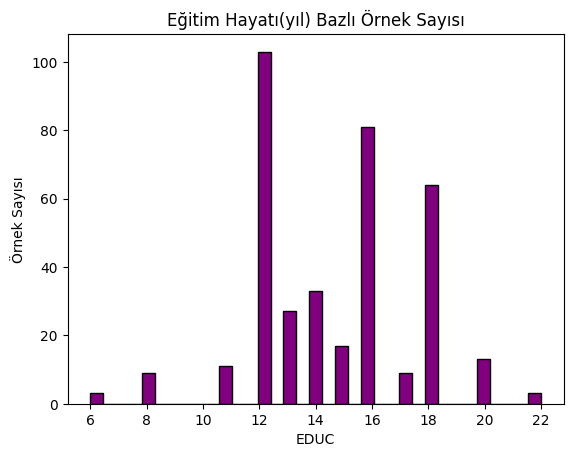

In [1042]:
plt.hist(oasis["EDUC"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("EDUC")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "EÄŸitim HayatÄ±(yÄ±l) BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

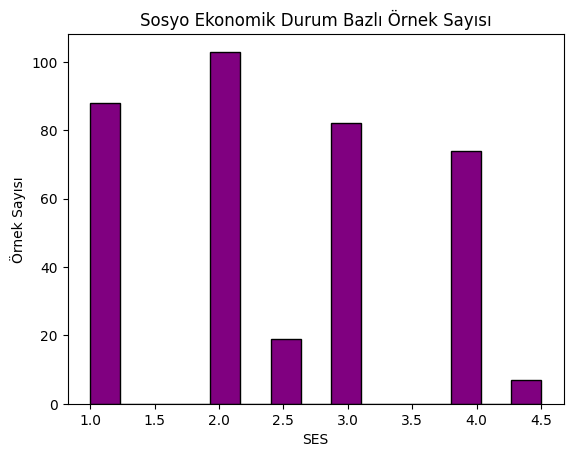

In [1043]:
plt.hist(oasis["SES"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("SES")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Sosyo Ekonomik Durum BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

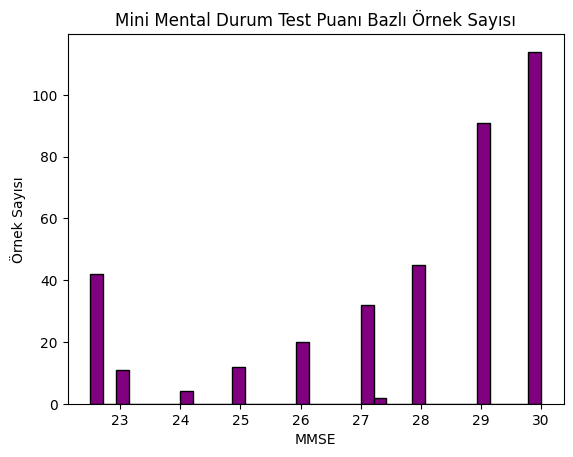

In [1044]:
plt.hist(oasis["MMSE"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("MMSE")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Mini Mental Durum Test PuanÄ± BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

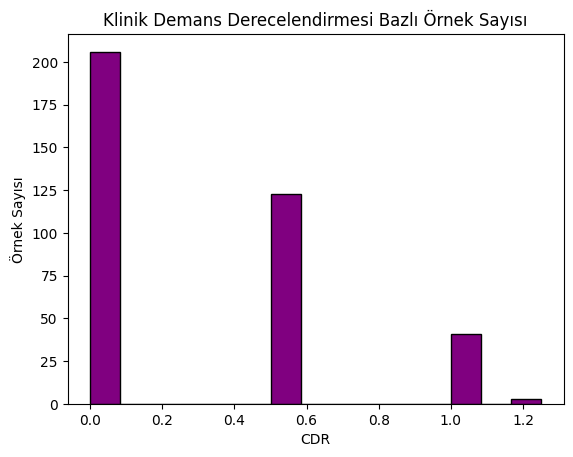

In [1045]:
plt.hist(oasis["CDR"], bins = 15, color= "purple", edgecolor= "black")
plt.xlabel("CDR")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Klinik Demans Derecelendirmesi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

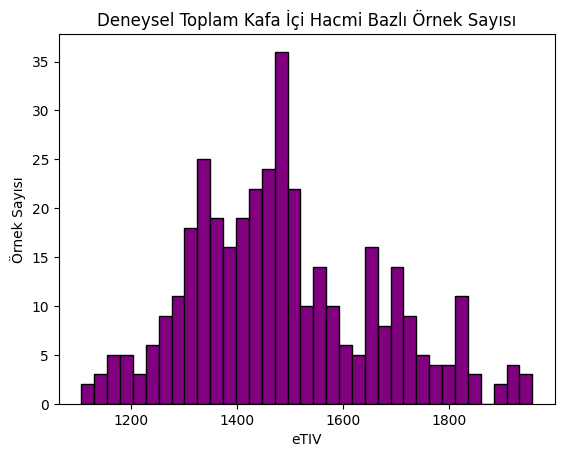

In [1046]:
plt.hist(oasis["eTIV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("eTIV")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Deneysel Toplam Kafa Ä°Ã§i Hacmi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

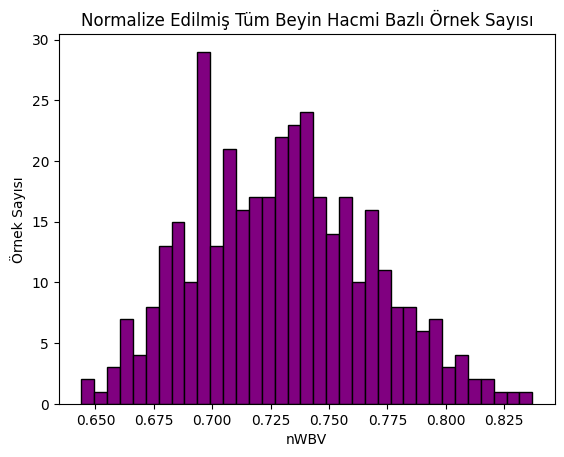

In [1047]:
plt.hist(oasis["nWBV"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("nWBV")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

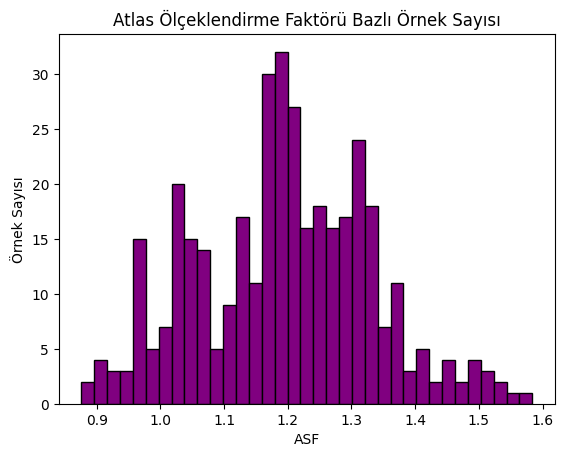

In [1048]:
plt.hist(oasis["ASF"], bins = 35, color= "purple", edgecolor= "black")
plt.xlabel("ASF")
plt.ylabel("Ã–rnek SayÄ±sÄ±")
plt.title( "Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼ BazlÄ± Ã–rnek SayÄ±sÄ±")
plt.show()

### Scatter Tablosu

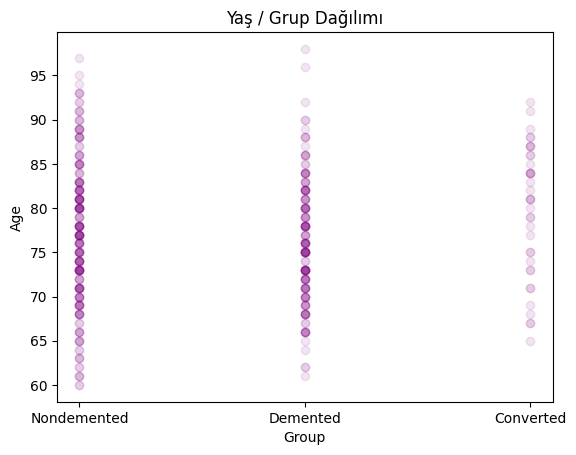

In [1049]:
plt.scatter(oasis["Group"], oasis["Age"], color="purple", alpha= 0.1)
plt.title("YaÅŸ / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('Age')
# plt.grid()
plt.show()

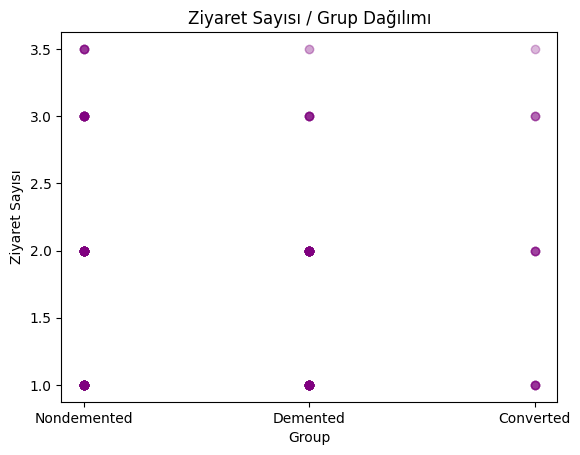

In [1050]:
plt.scatter(oasis["Group"], oasis["Visit"], color="purple", alpha= 0.1)
plt.title("Ziyaret SayÄ±sÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('Ziyaret SayÄ±sÄ±')
plt.show()

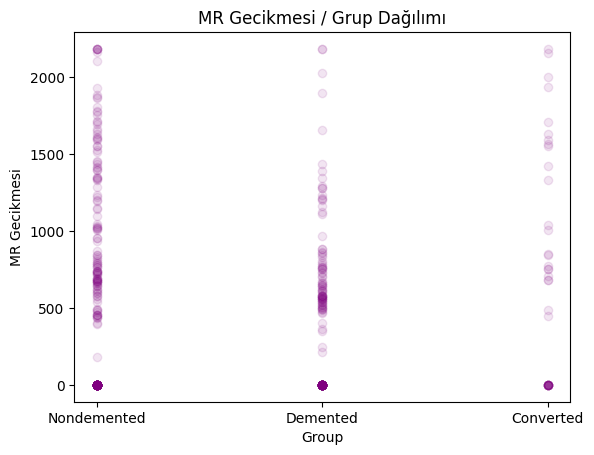

In [1051]:
plt.scatter(oasis["Group"], oasis["MR Delay"], color="purple", alpha= 0.1)
plt.title("MR Gecikmesi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('MR Gecikmesi')
plt.show()

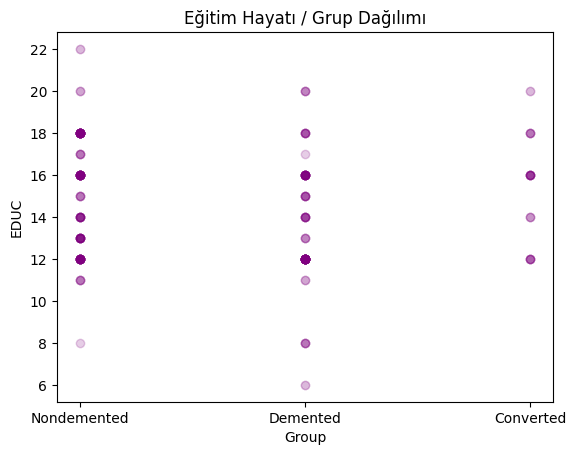

In [1052]:
plt.scatter(oasis["Group"], oasis["EDUC"], color="purple", alpha= 0.1)
plt.title("EÄŸitim HayatÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('EDUC')
plt.show()

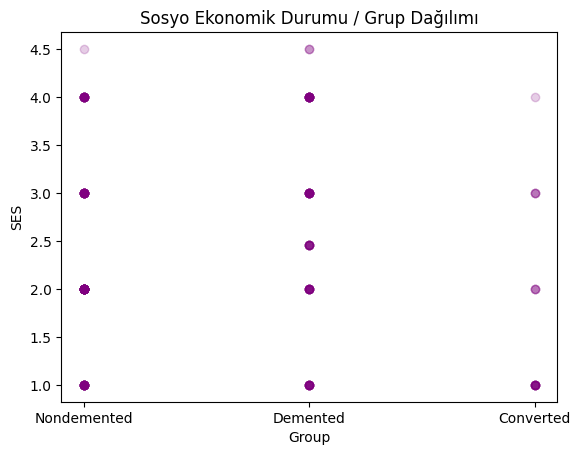

In [1053]:
plt.scatter(oasis["Group"], oasis["SES"], color="purple", alpha= 0.1)
plt.title("Sosyo Ekonomik Durumu / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('SES')
plt.show()

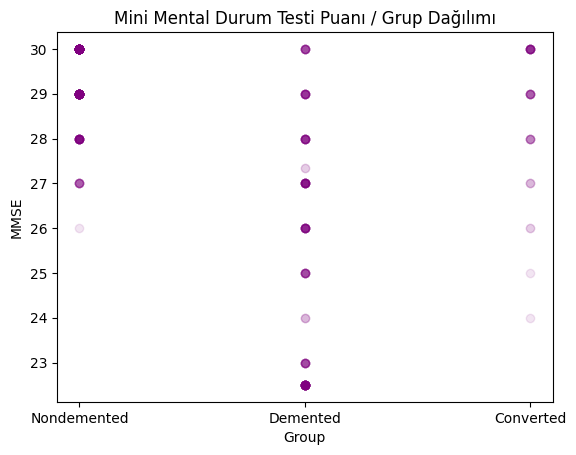

In [1054]:
plt.scatter(oasis["Group"], oasis["MMSE"], color="purple", alpha= 0.1)
plt.title("Mini Mental Durum Testi PuanÄ± / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('MMSE')
plt.show()

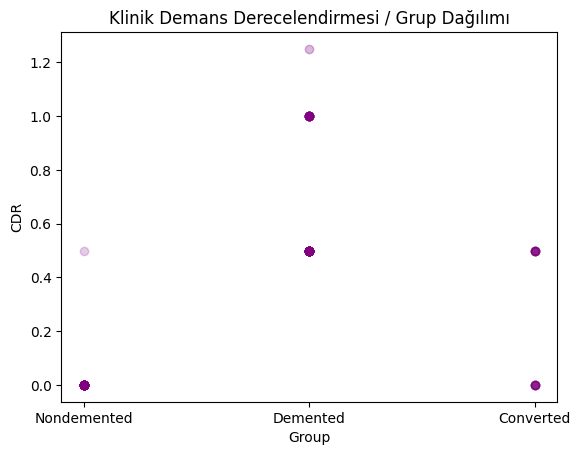

In [1055]:
plt.scatter(oasis["Group"], oasis["CDR"], color="purple", alpha= 0.1)
plt.title("Klinik Demans Derecelendirmesi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('CDR')
plt.show()

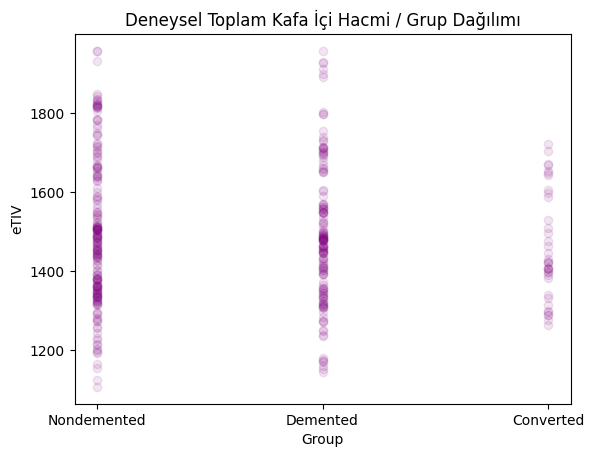

In [1056]:
plt.scatter(oasis["Group"], oasis["eTIV"], color="purple", alpha= 0.1)
plt.title("Deneysel Toplam Kafa Ä°Ã§i Hacmi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('eTIV')
plt.show()

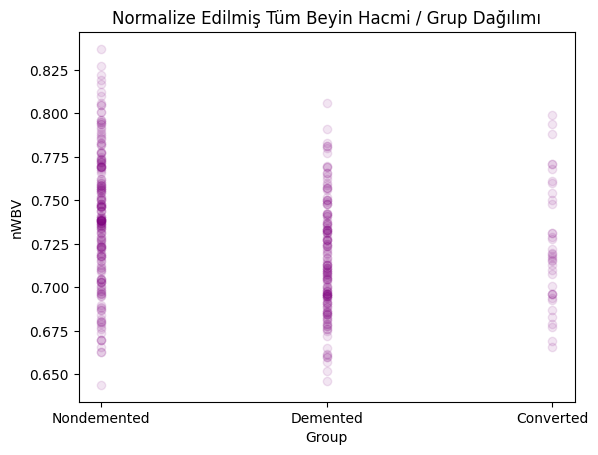

In [1057]:
plt.scatter(oasis["Group"], oasis["nWBV"], color="purple", alpha= 0.1)
plt.title("Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('nWBV')
plt.show()

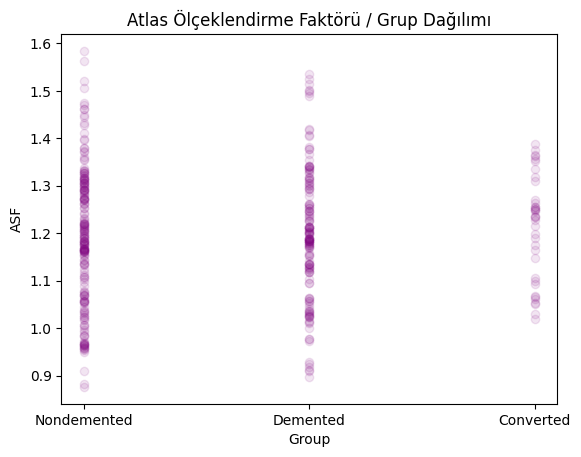

In [1058]:
plt.scatter(oasis["Group"], oasis["ASF"], color="purple", alpha= 0.1)
plt.title("Atlas Ã–lÃ§eklendirme FaktÃ¶rÃ¼ / Grup DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('Group')
plt.ylabel('ASF')
plt.show()

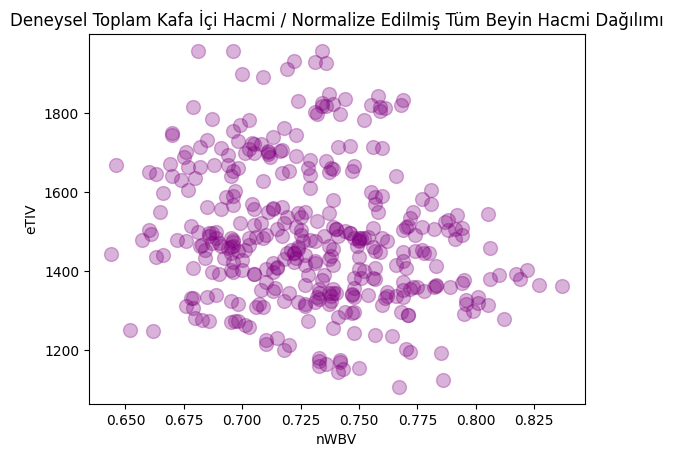

In [1059]:
plt.scatter(oasis["nWBV"], oasis["eTIV"], color="purple", alpha= 0.3, s= 100)
plt.title("Deneysel Toplam Kafa Ä°Ã§i Hacmi / Normalize EdilmiÅŸ TÃ¼m Beyin Hacmi DaÄŸÄ±lÄ±mÄ±")
plt.xlabel('nWBV')
plt.ylabel('eTIV')
plt.show()

# Makine Ã–ÄŸrenmesi

In [1060]:
# GÃ¼ncellenmiÅŸ veriyi makine Ã¶ÄŸrenmesine hazÄ±r olacak ÅŸekilde kaydet
oasis.to_csv("oasisUpdateMakine.csv", index=False)

# Makine Ã¶ÄŸrenmesinde kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

In [1061]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2182.5   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0   F    R   65   

     EDUC       SES  MMSE  CDR    eTIV   nWBV    ASF  
0    14.0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1    14.0  2.000000  30.0  0.0  1957.0  0.681  0.876  
2    12.0  2.460452  23.0  0.5  1678.0  0.736  1.046  
3    12.0  2.460452  28.0  0.5  1738.0  0.713  1.010  
4    12.0  2.460452  22.5  0.5  1698.0  0.701  1.034  
..    ...       ...   ...  ...     ...    ...    ...  
368  16.0  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  16.0  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  13.0  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  13.0  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  13.0  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [1062]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# GÃ¼ncellenmiÅŸ veriyi yÃ¼kle
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Kategorik sÃ¼tunlarÄ± sayÄ±sal verilere Ã§evir (encoding)
le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

# Gerekli olmayan sÃ¼tunlarÄ± Ã§Ä±kar
# Subject ID ve MRI ID Ã¶nemli olmadÄ±ÄŸÄ±ndan Ã§Ä±karÄ±ldÄ±. Hand hep deÄŸerleri aynÄ± olduÄŸundan Ã§Ä±karÄ±ldÄ±
# Geriye kalan sÃ¼tunlar X(BaÄŸÄ±msÄ±z DeÄŸiÅŸkenler) deÄŸiÅŸkene atandÄ±
# axis=1: SÃ¼tunlarÄ± hedef aldÄ±ÄŸÄ±nÄ± belirtir (satÄ±rlarÄ± kaldÄ±rmak iÃ§in axis=0 kullanÄ±lÄ±r)
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

In [1063]:
# Veriyi eÄŸitim (%80) ve test (%20) olarak ayÄ±r (test_size=0.2)
# X_train: EÄŸitim iÃ§in kullanÄ±lacak baÄŸÄ±msÄ±z deÄŸiÅŸkenler.
# X_test : Test iÃ§in kullanÄ±lacak baÄŸÄ±msÄ±z deÄŸiÅŸkenler.
# y_train: EÄŸitim iÃ§in kullanÄ±lacak hedef deÄŸiÅŸken.
# y_test : Test iÃ§in kullanÄ±lacak hedef deÄŸiÅŸken.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluÅŸturma ve eÄŸitme
# Model OluÅŸturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
# Model EÄŸitme
rf_model.fit(X_train, y_train)

# Test verisi (X_test) ile tahmin yap
y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)

print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]


In [1064]:
# Model performansÄ±nÄ± yazdÄ±r

# DoÄŸruluk OranÄ±, test verilerindeki (DoÄŸru Tahmin SayÄ±sÄ± / Toplam Tahmin SayÄ±sÄ±)
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))


# Precision (Kesinlik): Tahmin edilen sÄ±nÄ±fa ait Ã¶rneklerin ne kadarÄ±nÄ±n doÄŸru olduÄŸunu Ã¶lÃ§er.
# Recall (DuyarlÄ±lÄ±k) : GerÃ§ek sÄ±nÄ±fa ait Ã¶rneklerin ne kadarÄ±nÄ±n doÄŸru tahmin edildiÄŸini Ã¶lÃ§er.
# F1-Score            : Precision ve Recall'un harmonik ortalamasÄ±dÄ±r.
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# SÄ±nÄ±flandÄ±rma Raporu'nun yorumu
#   SÄ±nÄ±f 0 Converted:
#      Precision: 0.75 (Modelin "0" dediÄŸi Ã¶rneklerin %75'i doÄŸru)
#      Recall   : 0.27 (GerÃ§ek "0" Ã¶rneklerinin sadece %27'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.40 (DÃ¼ÅŸÃ¼k performans)

#   SÄ±nÄ±f 1 Demented:
#      Precision: 0.94 (Modelin "1" dediÄŸi Ã¶rneklerin %94'Ã¼ doÄŸru)
#      Recall   : 0.97 (GerÃ§ek "1" Ã¶rneklerinin %97'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.95 (Ã‡ok iyi performans)

#   SÄ±nÄ±f 2 Nondemented:
#      Precision: 0.82 (Modelin "2" dediÄŸi Ã¶rneklerin %82'si doÄŸru)
#      Recall   : 0.97 (GerÃ§ek "2" Ã¶rneklerinin %97'si doÄŸru tahmin edilmiÅŸ)
#      F1-Score : 0.89 (Ä°yi performans)


# Bu matris, modelin tahminlerinin gerÃ§ek deÄŸerlerle nasÄ±l uyuÅŸtuÄŸunu gÃ¶sterir.
# SatÄ±rlar: GerÃ§ek sÄ±nÄ±flar
# SÃ¼tunlar: Tahmin edilen sÄ±nÄ±flar
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi'nin yorumu
# GerÃ§ek SÄ±nÄ±f	  Tahmin SÄ±nÄ±f 0	  Tahmin SÄ±nÄ±f 1	  Tahmin SÄ±nÄ±f 2	  Toplam
#    0	            3 (doÄŸru)	        1 (yanlÄ±ÅŸ)	        7 (yanlÄ±ÅŸ)	        11
#    1	            1 (yanlÄ±ÅŸ)	       31 (doÄŸru)	        0 (yanlÄ±ÅŸ)	        32
#    2	            0 (yanlÄ±ÅŸ)	        1 (yanlÄ±ÅŸ)	       31 (doÄŸru)	        32

#   SÄ±nÄ±f 0 Converted (11 Ã¶rnek):
#      Model, sadece 3 tanesini doÄŸru tahmin etmiÅŸ, 8'ini yanlÄ±ÅŸ sÄ±nÄ±flandÄ±rmÄ±ÅŸ
#   SÄ±nÄ±f 1 Demented (32 Ã¶rnek):
#      31 Ã¶rneÄŸi doÄŸru, sadece 1 tanesi yanlÄ±ÅŸ
#   SÄ±nÄ±f 2 Nondemented (32 Ã¶rnek):
#      31 Ã¶rneÄŸi doÄŸru, sadece 1 tanesi yanlÄ±ÅŸ

DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]


DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


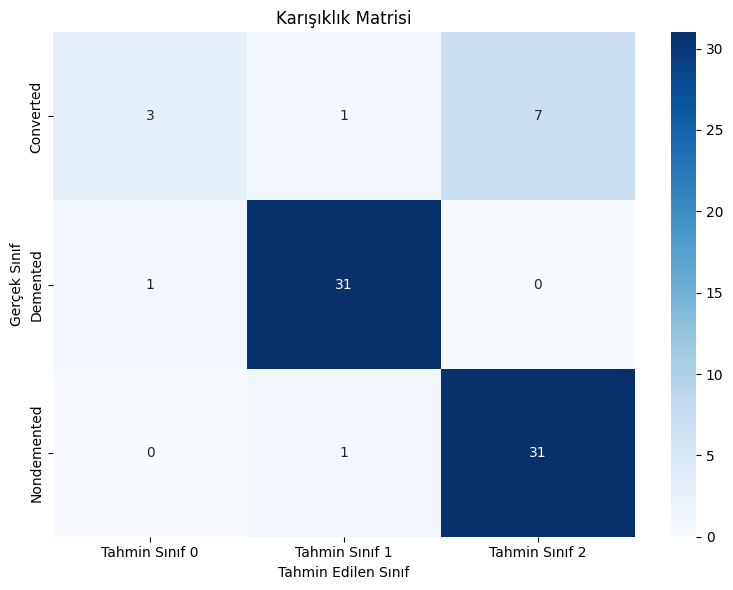

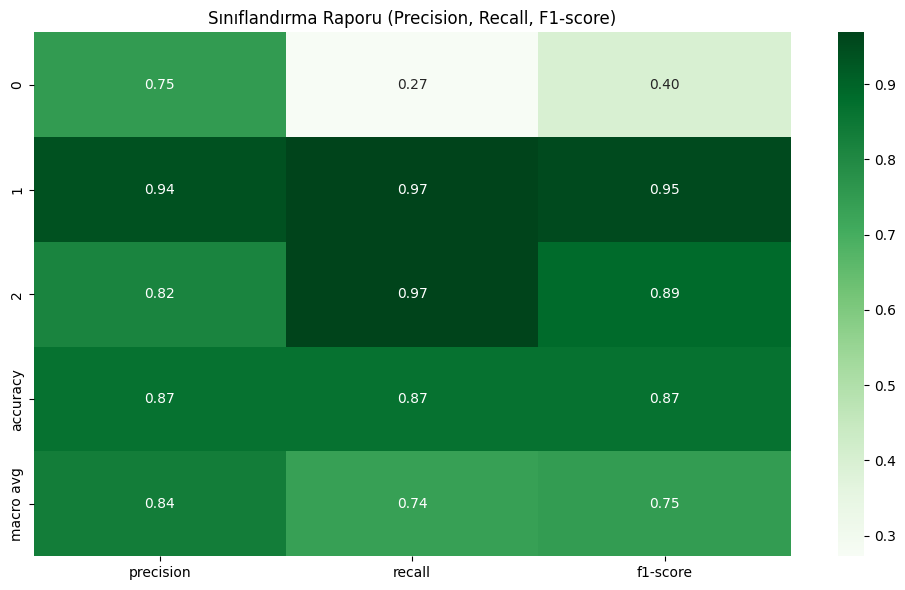

In [1065]:
# DoÄŸruluk OranÄ±
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisini gÃ¶rselleÅŸtir
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], 
            yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

# SÄ±nÄ±flandÄ±rma raporunu gÃ¶rselleÅŸtir

# SÄ±nÄ±flandÄ±rma Raporunu Al
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Raporu DataFrame'e DÃ¶nÃ¼ÅŸtÃ¼r
report_df = pd.DataFrame(report_dict).transpose()

# GÃ¶rselleÅŸtir
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

## Accuracy artÄ±rma Ã§alÄ±ÅŸmalarÄ±


Ã–zellik Ã–nem Tablosu:
     feature  importance
6       CDR    0.492248
5      MMSE    0.149956
8      nWBV    0.074405
0  MR Delay    0.068583
2       Age    0.047408
9       ASF    0.042121
3      EDUC    0.039958
7      eTIV    0.036795
4       SES    0.030847
1       M/F    0.017679


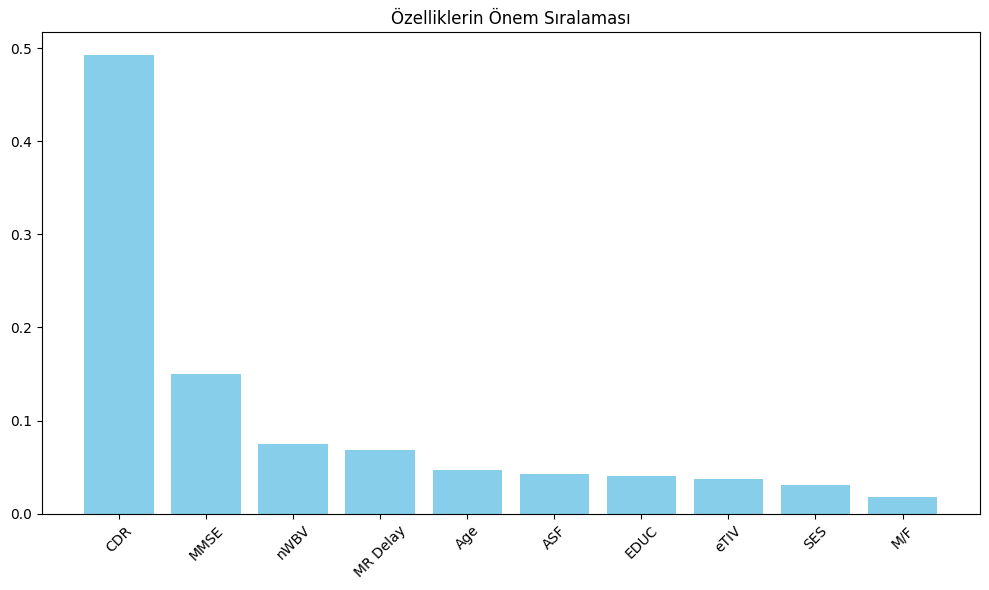

In [1066]:
# Ã–zellik Ã¶nemlerini al
importances = rf_model.feature_importances_
feature_names = X.columns

# Ã–zellik Ã¶nem tablosu oluÅŸtur
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Ã–zellik Ã¶nem tablosunu yazdÄ±r
print("\nÃ–zellik Ã–nem Tablosu:\n", feature_importance_df)

# Ã–zellik Ã¶nemlerini gÃ¶rselleÅŸtir
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]

plt.title("Ã–zelliklerin Ã–nem SÄ±ralamasÄ±")
plt.bar(range(X.shape[1]), importances[indices], color='skyblue')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

### AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nce | acc : 0.8666666666666667

In [1067]:
# AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nceye geri dÃ¶nÃ¼ÅŸ:
oasis = pd.read_csv("oasisUpdateNull.csv")

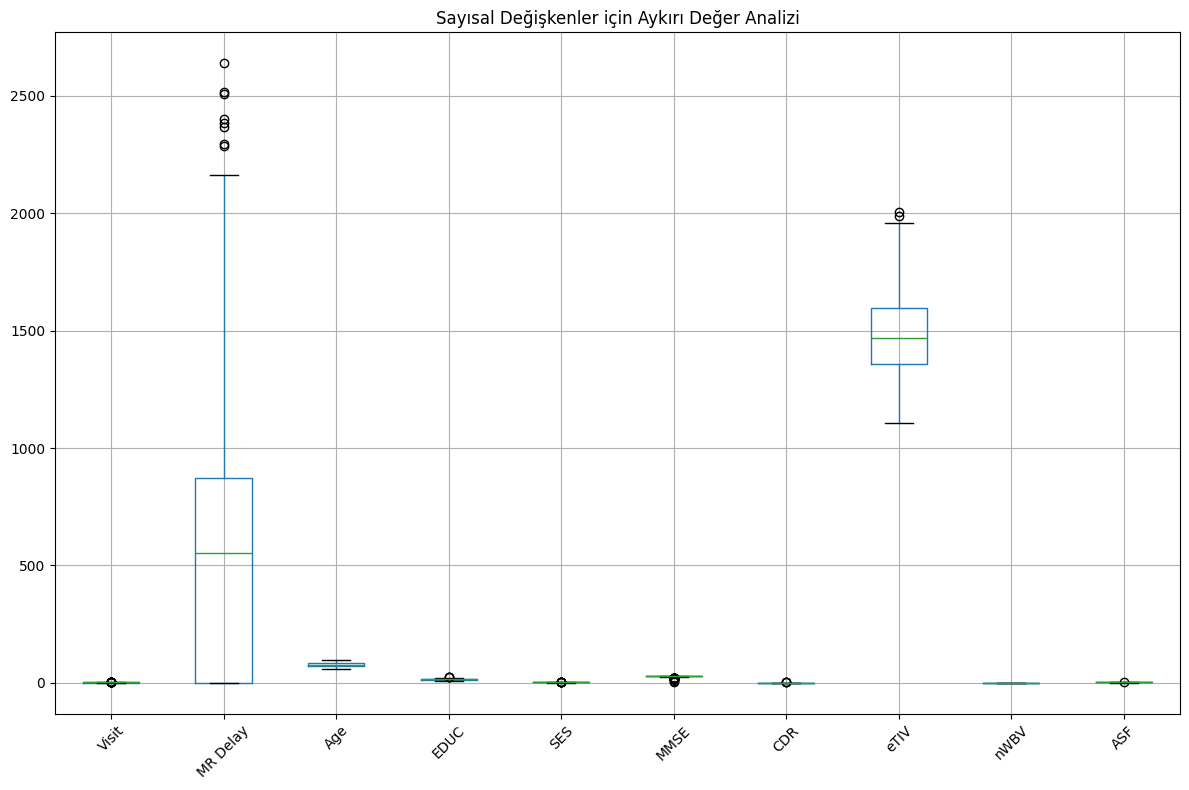

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF  
0      14  2.000000  27.0  0.0  1987  0.696  0.883  
1      14  2.000000  30.0  0.0  2004  0.681  0.876  
2      12  2.460452  23.0  0.5  1678  0.736  1.046  
3      12  2.460452  28.0  0.5  1738  0.713  1.010  
4      12  2.460452  22.0  0.5  1698  0.701  1.034  
..    ...       ...   ...  ...   ...    ...    ...  
368    16  1.000000  28.0  0.5  1693  0.694  1.037  
369    16  1.000000  26.0  0.5  1688  0.675  1.040  
370    13  2.000000  30.0  0.0  1319  0.801  1.331  
371    13  2.000000  30.0  0.0  1327  0.796  1.323  
372    13  2.000000  30.0  0.0  1333  0.801  1.317  

[373 rows x 15 columns]

In [1068]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

oasis

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


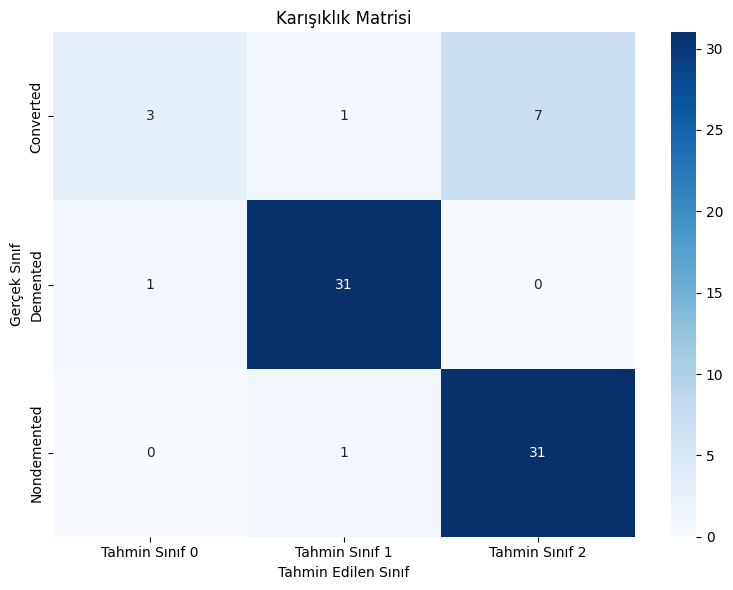

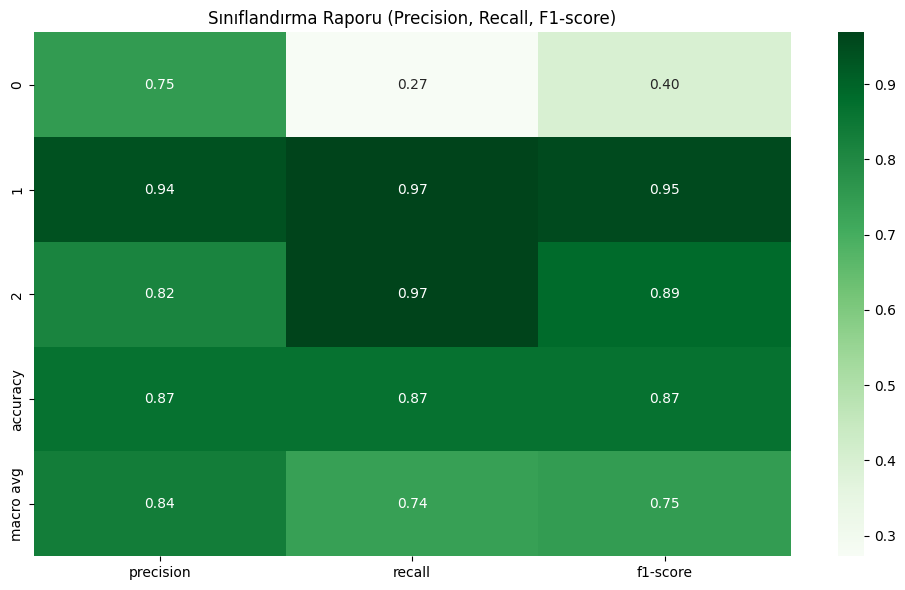

In [1069]:
# AykÄ±rÄ± DeÄŸerler fixlenmeden Ã¶nce:
oasis = pd.read_csv("oasisUpdateNull.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### AykÄ±rÄ± deÄŸerler fixlendikten sonra | acc : 0.8666666666666667

In [1070]:
# GÃ¼ncel veri tabanÄ±mÄ±za geri dÃ¶nelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

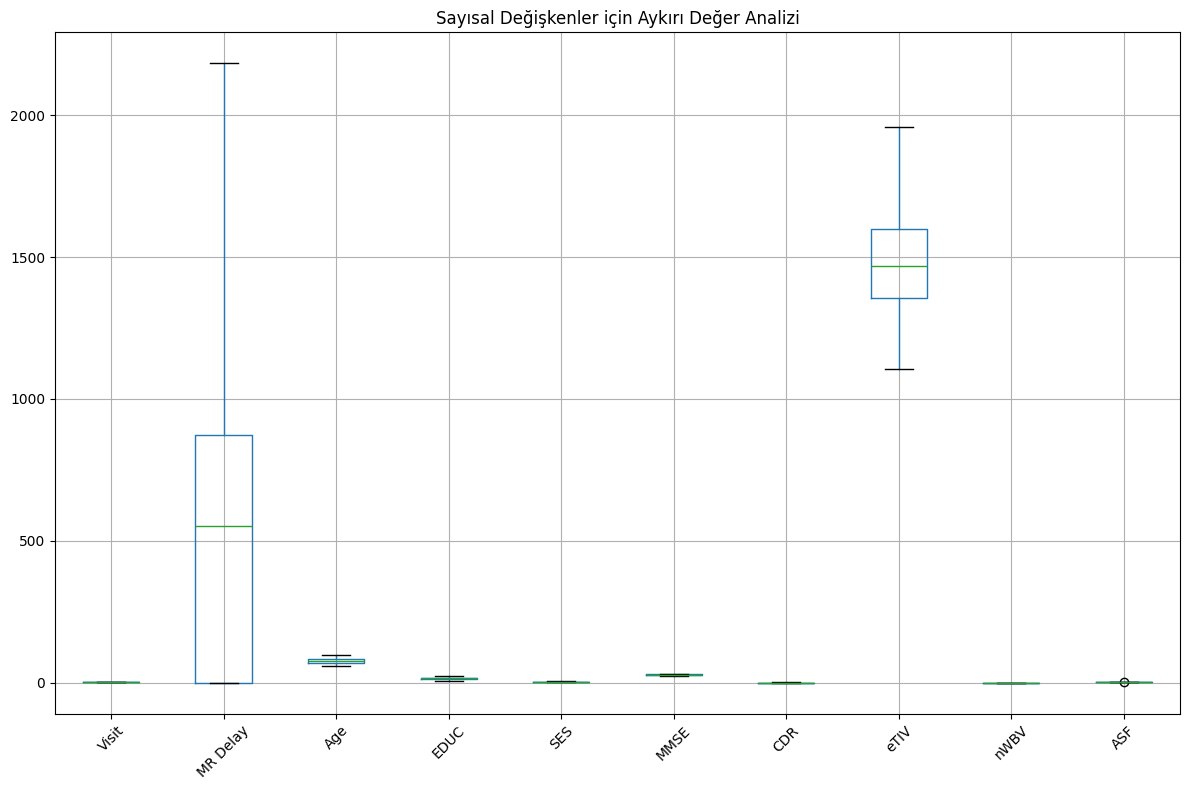

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2182.5   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0   F    R   65   

     EDUC       SES  MMSE  CDR    eTIV   nWBV    ASF  
0    14.0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1    14.0  2.000000  30.0  0.0  1957.0  0.681  0.876  
2    12.0  2.460452  23.0  0.5  1678.0  0.736  1.046  
3    12.0  2.460452  28.0  0.5  1738.0  0.713  1.010  
4    12.0  2.460452  22.5  0.5  1698.0  0.701  1.034  
..    ...       ...   ...  ...     ...    ...    ...  
368  16.0  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  16.0  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  13.0  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  13.0  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  13.0  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

In [1071]:
# SayÄ±sal sÃ¼tunlarÄ± seÃ§
numeric_columns = oasis.select_dtypes(include=['float64', 'int64']).columns

# SayÄ±sal sÃ¼tunlar iÃ§in kutu grafiÄŸi oluÅŸturma
plt.figure(figsize=(12, 8))
oasis[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title("SayÄ±sal DeÄŸiÅŸkenler iÃ§in AykÄ±rÄ± DeÄŸer Analizi")
plt.tight_layout()
plt.show()

oasis

EÄŸitim verisi boyutu: (298, 10)
Test verisi boyutu: (75, 10)
Toplam tahmin sayÄ±sÄ±: 75
[1 0 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 2 1 2 2 1 1 2 1 1 2 2 0 1 2 2 1 2 2 2
 2 2 1 2 2 1 0 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 1 2 2 1 1 0 1 2 2 1 2 1 1 2 2
 2]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667

 SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75


KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]
DoÄŸruluk OranÄ± (Accuracy): 0.8666666666666667


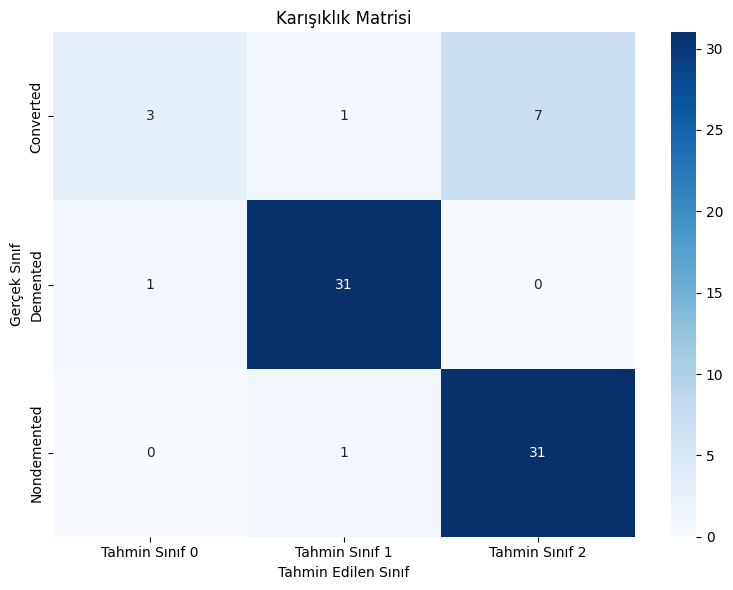

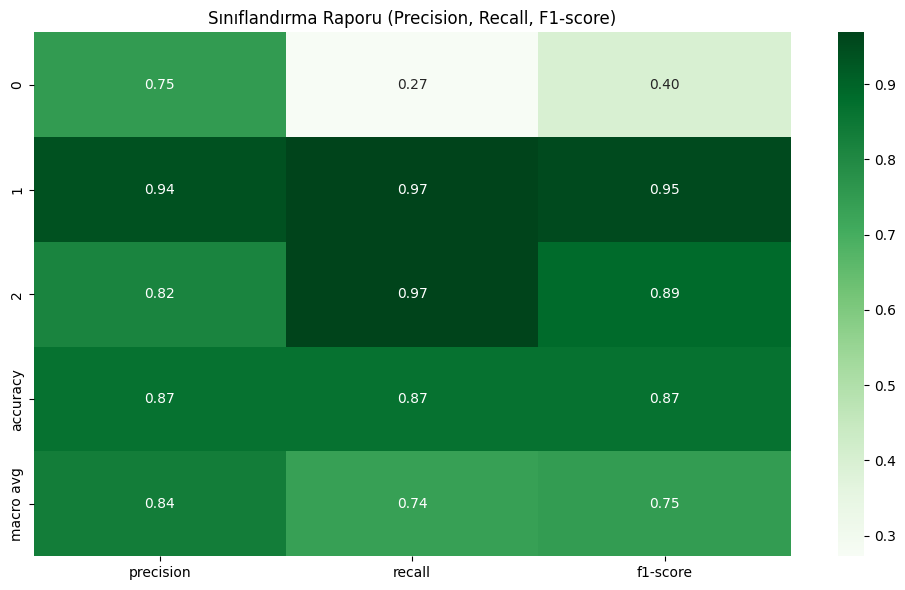

In [1072]:
# GÃ¼ncel veri tabanÄ±mÄ±za geri dÃ¶nelim:
oasis = pd.read_csv("oasisUpdateMakine.csv")

le = LabelEncoder()
oasis['Group'] = le.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
oasis['M/F'] = le.fit_transform(oasis['M/F'])  # 0: F, 1: M
oasis['Hand'] = le.fit_transform(oasis['Hand'])  # (silsek de encode'lu olsun xd)

X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler (X)
y = oasis['Group']  # Hedef deÄŸiÅŸken (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("EÄŸitim verisi boyutu:", X_train.shape)
print("Test verisi boyutu:", X_test.shape)
print("Toplam tahmin sayÄ±sÄ±:", len(y_pred))
print(y_pred)
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))
print("\n SÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Tahmin SÄ±nÄ±f 0', 'Tahmin SÄ±nÄ±f 1', 'Tahmin SÄ±nÄ±f 2'], yticklabels=['Converted', 'Demented', 'Nondemented'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.tight_layout()
plt.show()

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (Precision, Recall, F1-score)")
plt.tight_layout()
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV, M/F | acc : 0.8666666666666667

In [1073]:
# BurasÄ±, AykÄ±rÄ± deÄŸerler fixlendikten sonra'nÄ±n aynÄ±sÄ±dÄ±r!
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.8666666666666667

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 3  1  7]
 [ 1 31  0]
 [ 0  1 31]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.94      0.97      0.95        32
           2       0.82      0.97      0.89        32

    accuracy                           0.87        75
   macro avg       0.84      0.74      0.75        75
weighted avg       0.86      0.87      0.84        75



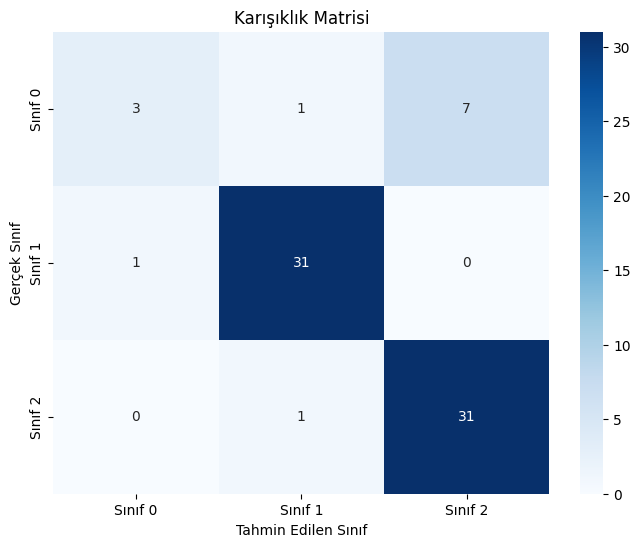

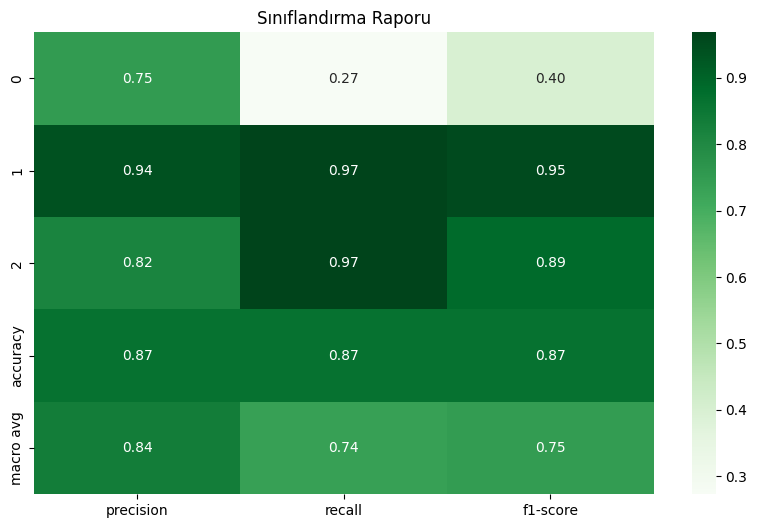

In [1074]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay | acc : 0.84

In [1075]:
# Ekstra olarak 'Age', 'SES', 'EDUC', 'ASF', 'eTIV', 'M/F' deÄŸerleri alÄ±nmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F', 'eTIV', 'ASF', 'EDUC', 'SES', 'Age'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.84

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 3 29  0]
 [ 1  1 30]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.94      0.91      0.92        32
           2       0.83      0.94      0.88        32

    accuracy                           0.84        75
   macro avg       0.76      0.74      0.74        75
weighted avg       0.83      0.84      0.83        75



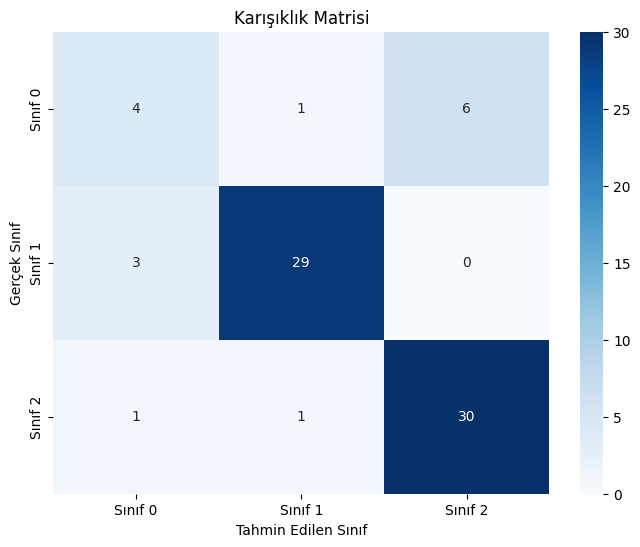

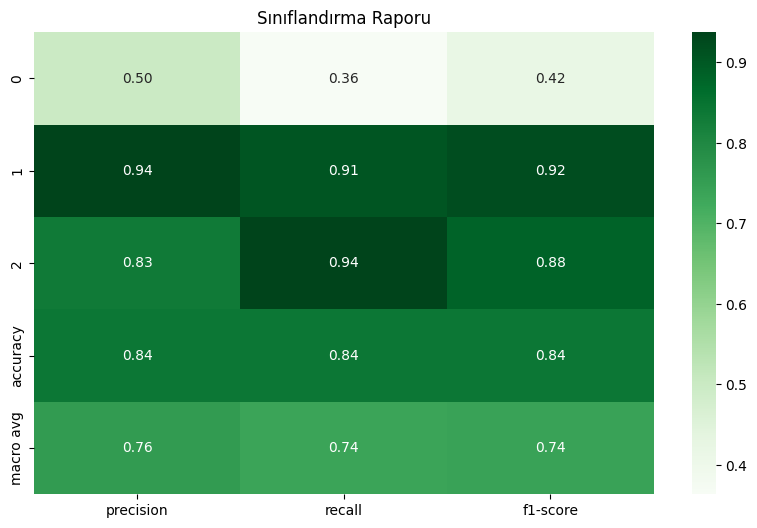

In [1076]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

### CDR, MMSE, nWBV, MR Delay, Age, SES, EDUC, ASF, eTIV | acc : 0.88

In [1077]:
# Ekstra olarak 'M/F' deÄŸeri alÄ±nmayacak
X = oasis.drop(['Subject ID', 'MRI ID', 'Hand', 'Group', 'Visit', 'M/F'], axis=1)
y = oasis['Group']

Model DoÄŸruluÄŸu (Accuracy): 0.88

KarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):
 [[ 4  1  6]
 [ 1 31  0]
 [ 0  1 31]]

SÄ±nÄ±flandÄ±rma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.94      0.97      0.95        32
           2       0.84      0.97      0.90        32

    accuracy                           0.88        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.88      0.88      0.86        75



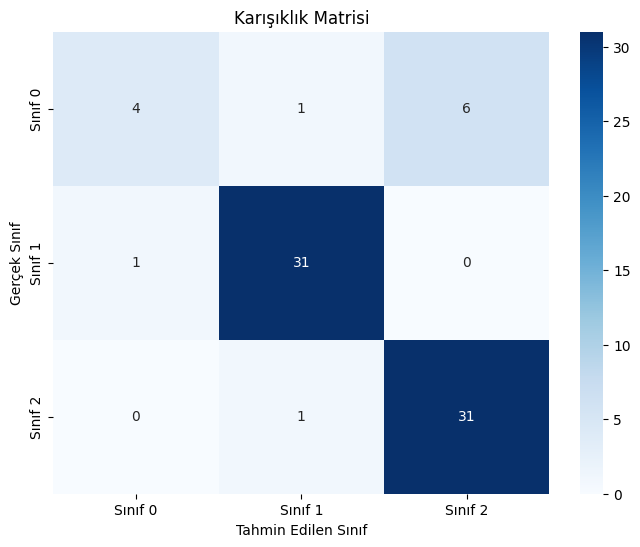

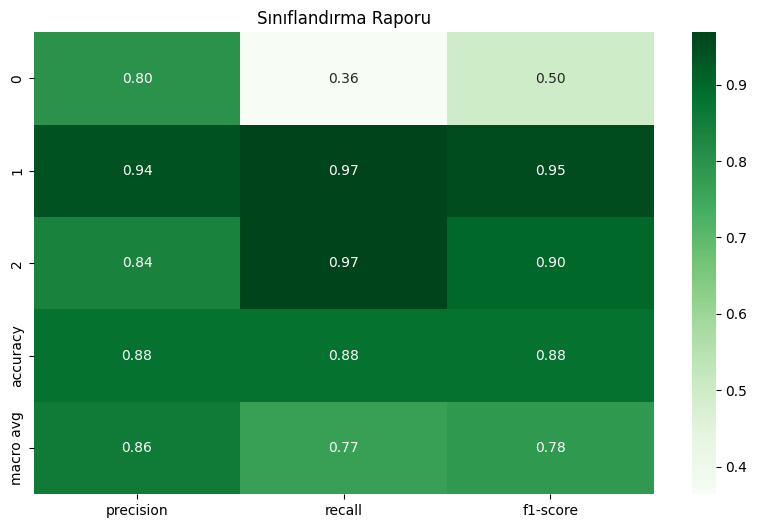

In [1078]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100, 100 adet oluÅŸturulan karar aÄŸacÄ±
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Model performansÄ±nÄ± deÄŸerlendirme
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))
print("\nKarÄ±ÅŸÄ±klÄ±k Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nSÄ±nÄ±flandÄ±rma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
# KarÄ±ÅŸÄ±klÄ±k Matrisi (GÃ¶rselleÅŸtirme)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'], yticklabels=['SÄ±nÄ±f 0', 'SÄ±nÄ±f 1', 'SÄ±nÄ±f 2'])
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi")
plt.show()
# SÄ±nÄ±flandÄ±rma Raporu (GÃ¶rselleÅŸtirme)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu")
plt.show()

# 2. DÃ¶nem

In [1102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [1103]:
# Son iÅŸlenen veriyi oku
oasis = pd.read_csv("oasisUpdateMakine.csv")

# Veriyi kaydet (2. dÃ¶nemde kullanÄ±lacak veri)
oasis.to_csv("oasisUpdate2.csv", index=False)

# 2. DÃ¶nemde kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdate2.csv")

In [1104]:
oasis

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented    1.0       0.0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented    2.0     457.0   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented    1.0       0.0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented    2.0     560.0   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented    3.0    1895.0   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented    2.0     842.0   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented    3.0    2182.5   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented    1.0       0.0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented    2.0     763.0   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented    3.0    1608.0   F    R   65   

     EDUC       SES  MMSE  CDR    eTIV   nWBV    ASF  
0    14.0  2.000000  27.0  0.0  1957.0  0.696  0.883  
1    14.0  2.000000  30.0  0.0  1957.0  0.681  0.876  
2    12.0  2.460452  23.0  0.5  1678.0  0.736  1.046  
3    12.0  2.460452  28.0  0.5  1738.0  0.713  1.010  
4    12.0  2.460452  22.5  0.5  1698.0  0.701  1.034  
..    ...       ...   ...  ...     ...    ...    ...  
368  16.0  1.000000  28.0  0.5  1693.0  0.694  1.037  
369  16.0  1.000000  26.0  0.5  1688.0  0.675  1.040  
370  13.0  2.000000  30.0  0.0  1319.0  0.801  1.331  
371  13.0  2.000000  30.0  0.0  1327.0  0.796  1.323  
372  13.0  2.000000  30.0  0.0  1333.0  0.801  1.317  

[373 rows x 15 columns]

## Smote

In [1210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Son iÅŸlenen veriyi oku
oasis = pd.read_csv("oasisUpdate2.csv")
# Veriyi kaydet (Smote kullanÄ±lacak veri)
oasis.to_csv("oasisUpdateSmote.csv", index=False)
# Smote kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdateSmote.csv")

# Kategorik sÃ¼tunlarÄ± sayÄ±sal verilere Ã§evir (encoding)
le_group = LabelEncoder()
oasis['Group'] = le_group.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
le_mf = LabelEncoder()
oasis['M/F'] = le_mf.fit_transform(oasis['M/F'])  # 0: F, 1: M
le_hand = LabelEncoder()
oasis['Hand'] = le_hand.fit_transform(oasis['Hand'])  # silinecek zaten

print(oasis['Group'].value_counts())

Group
2    190
1    146
0     37
Name: count, dtype: int64


In [1211]:
# EÄŸitim ve test verisini ayÄ±rmak iÃ§in Ã¶zellikler ve hedef belirlenir
features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F']  # KullanÄ±lacak Ã¶zellikler listesi
X = oasis[features]  # Ã–zellikler
y = oasis['Group']  # Hedef deÄŸiÅŸken

seed = 42;

# EÄŸitim ve test verilerine bÃ¶lelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# Ã¶nceden bÃ¶lÃ¼yoruz ki smote kullandÄ±ÄŸÄ±mÄ±zda test olarak kullanÄ±caÄŸÄ±mÄ±z veriler gerÃ§ek veri olarak kalsÄ±n!

# SMOTE ile sadece eÄŸitim verisini dengeleyelim
#smote = SMOTE(sampling_strategy={0: 1000, 1: 1000, 2: 1000}, random_state=seed) # Smote ile artÄ±rma miktarÄ±
#smote = SMOTE(sampling_strategy='auto', random_state=seed) # azÄ±nlÄ±k sÄ±nÄ±flarÄ±, en bÃ¼yÃ¼k sÄ±nÄ±fÄ±n Ã¶rnek sayÄ±sÄ±na eÅŸit olacak ÅŸekilde Ã§oÄŸaltÄ±r.
smote = SMOTE(random_state=seed) # otomatik dengeleme. sampling_strategy='auto' ile aynÄ± mantÄ±k
SmoteX_train, SmoteY_train = smote.fit_resample(X_train, y_train)

# Random Forest modelini oluÅŸturma ve eÄŸitme
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_classifier.fit(SmoteX_train, SmoteY_train) # EÄŸitimde Smote ile artÄ±rÄ±lmÄ±ÅŸ verileri koyuyoruz
#rf_classifier.fit(X_train, y_train) # Smote olmadan normal random forest eÄŸitimi

# Test seti Ã¼zerinde tahmin yapma
y_pred = rf_classifier.predict(X_test)

print("SMOTE ile EÄŸitim Seti Boyutu:", SmoteX_train.shape)
print("EÄŸitim Seti Boyutu:", X_train.shape)
print("Test Seti Boyutu:", X_test.shape)
print("Model DoÄŸruluÄŸu (Accuracy):", accuracy_score(y_test, y_pred))

SMOTE ile EÄŸitim Seti Boyutu: (474, 9)
EÄŸitim Seti Boyutu: (298, 9)
Test Seti Boyutu: (75, 9)
Model DoÄŸruluÄŸu (Accuracy): 0.8533333333333334


In [1212]:
from collections import Counter

# SMOTE uygulanmadan Ã¶nce sÄ±nÄ±f daÄŸÄ±lÄ±mÄ±
print("Orijinal EÄŸitim Verisi SÄ±nÄ±f DaÄŸÄ±lÄ±mÄ±:")
print(Counter(y_train))

# SMOTE ile dengelenmiÅŸ sÄ±nÄ±f daÄŸÄ±lÄ±mÄ±
print("\nSMOTE UygulandÄ±ktan Sonra EÄŸitim Verisi SÄ±nÄ±f DaÄŸÄ±lÄ±mÄ±:")
print(Counter(SmoteY_train))

Orijinal EÄŸitim Verisi SÄ±nÄ±f DaÄŸÄ±lÄ±mÄ±:
Counter({2: 158, 1: 114, 0: 26})

SMOTE UygulandÄ±ktan Sonra EÄŸitim Verisi SÄ±nÄ±f DaÄŸÄ±lÄ±mÄ±:
Counter({2: 158, 1: 158, 0: 158})


DoÄŸruluk OranÄ± (Accuracy): 0.8533333333333334


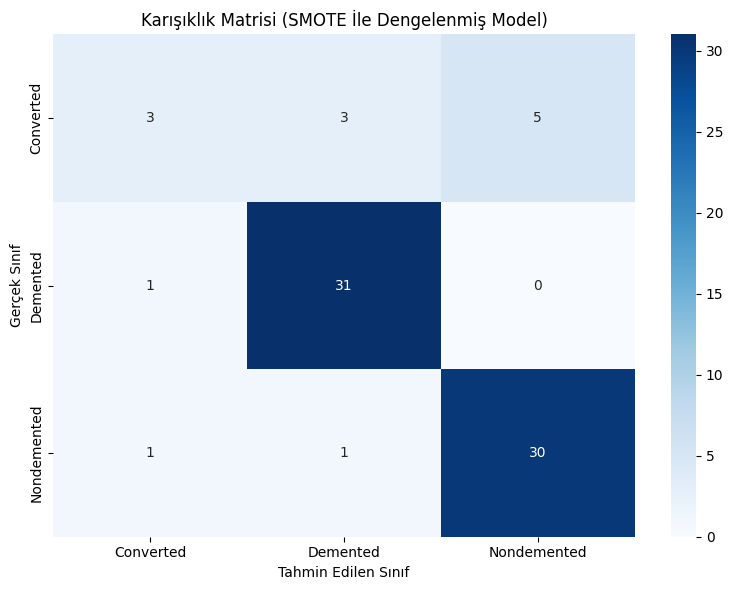

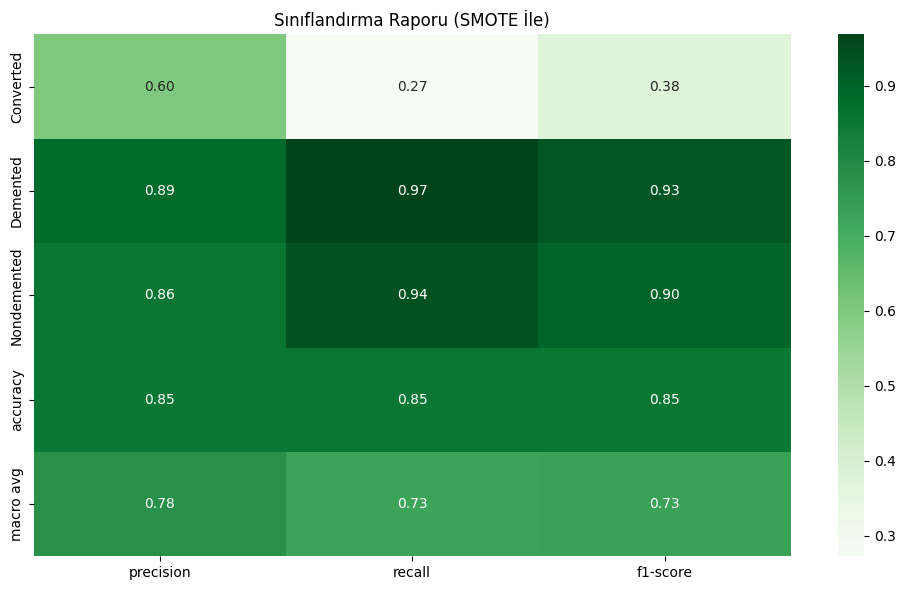

In [1213]:
# DoÄŸruluk
print("DoÄŸruluk OranÄ± (Accuracy):", accuracy_score(y_test, y_pred))

# KarÄ±ÅŸÄ±klÄ±k Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_group.classes_, 
            yticklabels=le_group.classes_)
plt.xlabel("Tahmin Edilen SÄ±nÄ±f")
plt.ylabel("GerÃ§ek SÄ±nÄ±f")
plt.title("KarÄ±ÅŸÄ±klÄ±k Matrisi (SMOTE Ä°le DengelenmiÅŸ Model)")
plt.tight_layout()
plt.show()

# SÄ±nÄ±flandÄ±rma Raporu
report_dict = classification_report(y_test, y_pred, target_names=le_group.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Greens")
plt.title("SÄ±nÄ±flandÄ±rma Raporu (SMOTE Ä°le)")
plt.tight_layout()
plt.show()

## Smote + Seed KarÅŸÄ±laÅŸtÄ±rmasÄ± (acc)

In [1215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Son iÅŸlenen veriyi oku
oasis = pd.read_csv("oasisUpdate2.csv")
# Veriyi kaydet (seed analiz etmede kullanÄ±lacak veri)
oasis.to_csv("oasisUpdateSeed.csv", index=False)
# seed analiz etmede kullanÄ±lacak veri setini yeniden oku
oasis = pd.read_csv("oasisUpdateSeed.csv")

# Kategorik sÃ¼tunlarÄ± sayÄ±sal verilere Ã§evir (encoding)
le_group = LabelEncoder()
oasis['Group'] = le_group.fit_transform(oasis['Group'])  # 0: Converted, 1: Demented, 2: Nondemented
le_mf = LabelEncoder()
oasis['M/F'] = le_mf.fit_transform(oasis['M/F'])  # 0: F, 1: M
le_hand = LabelEncoder()
oasis['Hand'] = le_hand.fit_transform(oasis['Hand'])  # silinecek zaten

print(oasis['Group'].value_counts())

Group
2    190
1    146
0     37
Name: count, dtype: int64


In [1216]:
# EÄŸitim ve test verisini ayÄ±rmak iÃ§in Ã¶zellikler ve hedef belirlenir
features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F']  # KullanÄ±lacak Ã¶zellikler listesi
X = oasis[features]  # Ã–zellikler
y = oasis['Group']  # Hedef deÄŸiÅŸken

# SonuÃ§larÄ± kaydedebilmek iÃ§in bir DataFrame oluÅŸtur
results = []

# FarklÄ± random_state deÄŸerlerini test et
#for seed in [1, 4, 16, 34, 42]:  # FarklÄ± random_state deÄŸerlerini test ediyoruz buna seed dedim
for seed in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:  # FarklÄ± random_state deÄŸerlerini test ediyoruz buna seed dedim
    # EÄŸitim ve test verilerine bÃ¶lelim
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)  # EÄŸitim ve test verisini %80-%20 olarak ayÄ±rÄ±yoruz

    # Normal Random Forest Modeli eÄŸitimi -----------------------------------------
    rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)  # Random Forest modelini oluÅŸtur
    rf_model.fit(X_train, y_train)  # Modeli eÄŸitim verisiyle eÄŸit
    y_pred = rf_model.predict(X_test)  # Test verisiyle tahmin yap
    accuracy_normal = accuracy_score(y_test, y_pred)  # DoÄŸruluk skorunu hesapla

    # SMOTE ile EÄŸitim ------------------------------------------------------------
    #smote = SMOTE(sampling_strategy='auto', random_state=seed) # Belirli bir sÄ±nÄ±fa kadar deÄŸil de sadece "azÄ±nlÄ±k" sÄ±nÄ±flarÄ± eÅŸitlemek
    #smote = SMOTE(random_state=seed) # otomatik dengeleme
    smote = SMOTE(sampling_strategy={0: 10000, 1: 10000, 2: 10000}, random_state=seed)  # SMOTE ile sÄ±nÄ±f dengesizliÄŸini dÃ¼zelt
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # EÄŸitim verisini (X_train, y_train) SMOTE ile Ã§oÄŸalt. X_train_smote, y_train_smote adÄ±nÄ± ver

    rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=seed)  # SMOTE ile eÄŸitim iÃ§in yeni model oluÅŸturduk ÅŸimdi
    rf_model_smote.fit(X_train_smote, y_train_smote)  # SMOTE'lu verilerle modeli eÄŸit (X_train_smote, y_train_smote)

    # Test verisini kullanarak tahmin yapma (SMOTE uygulanmadÄ±)
    y_pred_smote = rf_model_smote.predict(X_test)  # Test verisiyle tahmin yap
    accuracy_smote = accuracy_score(y_test, y_pred_smote)  # SMOTE'lu modelin doÄŸruluk skorunu hesapla

    # SonuÃ§larÄ± kaydet ekrana yazdÄ±racak
    results.append({
        "Random State": seed,  # FarklÄ± random_state deÄŸeri
        "Normal Model Accuracy": accuracy_normal,  # Normal modelin doÄŸruluÄŸu
        "SMOTE Model Accuracy": accuracy_smote,  # SMOTE'lu modelin doÄŸruluÄŸu
        "Normal Model Train Size": X_train.shape[0],  # Normal model iÃ§in eÄŸitim verisi boyutu
        "Normal Model Test Size": X_test.shape[0],  # Normal model iÃ§in test verisi boyutu
        "SMOTE Train Size": X_train_smote.shape[0],  # SMOTE'lu model iÃ§in eÄŸitim verisi boyutu
        "Test Set Class Distribution": y_test.value_counts().to_dict(),  # Test setindeki sÄ±nÄ±f daÄŸÄ±lÄ±mÄ±
        "SMOTE Train Class Distribution": y_train_smote.value_counts().to_dict()  # SMOTE sonrasÄ± eÄŸitim setindeki sÄ±nÄ±f daÄŸÄ±lÄ±mÄ±
    })

# SonuÃ§larÄ± DataFrame'e Ã§evir
results_df = pd.DataFrame(results)  # Elde edilen sonuÃ§larÄ± DataFrame'e dÃ¶nÃ¼ÅŸtÃ¼r

# Veriyi "uzun formata" dÃ¶nÃ¼ÅŸtÃ¼r
results_long = pd.melt(results_df, id_vars="Random State", value_vars=["Normal Model Accuracy", "SMOTE Model Accuracy"],
                      var_name="Model", value_name="DoÄŸruluk Skoru")  # Veriyi uzun formata dÃ¶nÃ¼ÅŸtÃ¼rerek gÃ¶rselleÅŸtirmeye uygun hale getir

# SonuÃ§larÄ± yazdÄ±r
print(results_df)  # TÃ¼m sonuÃ§larÄ± yazdÄ±r

# Normal ve SMOTE model doÄŸruluklarÄ±nÄ±n ortalamalarÄ±nÄ± hesapla
average_normal_accuracy = results_df['Normal Model Accuracy'].mean()  # Normal model doÄŸruluklarÄ±nÄ±n ortalamasÄ±nÄ± hesapla
average_smote_accuracy = results_df['SMOTE Model Accuracy'].mean()  # SMOTE model doÄŸruluklarÄ±nÄ±n ortalamasÄ±nÄ± hesapla

print(f"Normal Model OrtalamasÄ±: {average_normal_accuracy:.4f}")  # Normal modelin ortalamasÄ±nÄ± yazdÄ±r
print(f"SMOTE Model OrtalamasÄ±: {average_smote_accuracy:.4f}")  # SMOTE modelin ortalamasÄ±nÄ± yazdÄ±r

   Random State  Normal Model Accuracy  SMOTE Model Accuracy  \
0             1               0.893333              0.906667   
1             2               0.946667              0.946667   
2             3               0.893333              0.893333   
3             4               0.946667              0.933333   
4             5               0.906667              0.946667   
5             6               0.893333              0.906667   
6             7               0.893333              0.893333   
7             8               0.893333              0.880000   
8             9               0.933333              0.933333   
9            10               0.946667              0.960000   

   Normal Model Train Size  Normal Model Test Size  SMOTE Train Size  \
0                      298                      75             30000   
1                      298                      75             30000   
2                      298                      75             30000   
3      

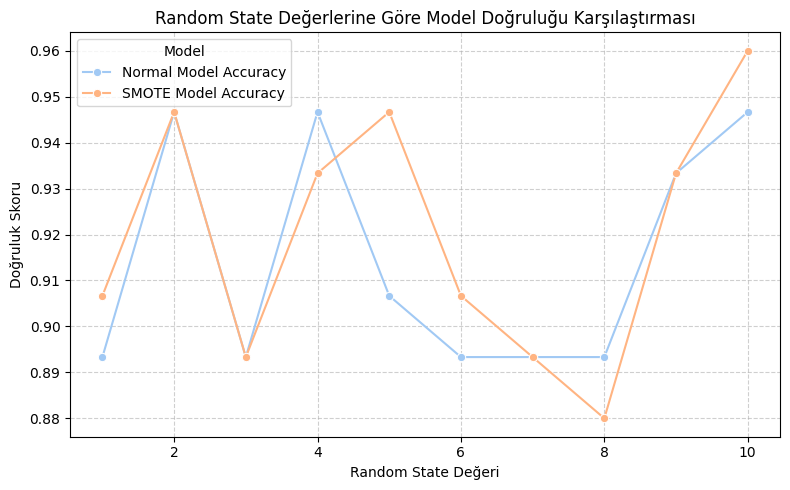

In [1217]:
# KarÅŸÄ±laÅŸtÄ±rma GrafiÄŸi (line)
plt.figure(figsize=(8, 5))  # Grafik boyutu
sns.lineplot(x='Random State', y='DoÄŸruluk Skoru', hue='Model', data=results_long, marker='o', palette='pastel')  # Ã‡izgi grafik
plt.title("Random State DeÄŸerlerine GÃ¶re Model DoÄŸruluÄŸu KarÅŸÄ±laÅŸtÄ±rmasÄ±")  # BaÅŸlÄ±k
plt.xlabel("Random State DeÄŸeri")  # X ekseni etiketi
plt.ylabel("DoÄŸruluk Skoru")  # Y ekseni etiketi
plt.legend(title="Model")  # AÃ§Ä±klama kutucuÄŸu
plt.grid(True, linestyle='--', alpha=0.6)  # Izgara Ã§izgileri
plt.tight_layout()
plt.show()